In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
plt.rcParams["figure.dpi"] = 120

In [32]:
data_dir = "../data"

In [300]:
# AG-Pubmed, Identity Counterfactual

dfs = [
    (
        "BERT",
        pd.read_pickle(f"{data_dir}/full/bert_results_719289_cf-constant_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    # (
    #     "RoBERTa",
    #     pd.read_pickle(f"{data_dir}/full/").dropna(
    #         subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
    #     ),
    # ),
    (
        "ALBERT",
        pd.read_pickle(f"{data_dir}/full/albert_results_719285_cf-constant_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "DistilBERT",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719286_cf-constant_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ELECTRA",
        pd.read_pickle(f"{data_dir}/full/electra_results_719288_cf-constant_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
]

trained_label = "Sports"

In [299]:
# AG-Pubmed, Constant Counterfactual

dfs = [
    (
        "BERT",
        pd.read_pickle(f"{data_dir}/full/bert_results_719253_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    # (
    #     "RoBERTa",
    #     pd.read_pickle(f"{data_dir}/full/").dropna(
    #         subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
    #     ),
    # ),
    (
        "ALBERT",
        pd.read_pickle(f"{data_dir}/full/albert_results_719278_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "DistilBERT",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719275_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ELECTRA",
        pd.read_pickle(f"{data_dir}/full/electra_results_719265_ds-ag-pubmed.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
]

trained_label = "Sports"

In [306]:
# MMLU, Identity Counterfactual

dfs = [
    (
        "BERT",
        pd.read_pickle(f"{data_dir}/full/bert_results_719254_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "RoBERTa",
        pd.read_pickle(f"{data_dir}/full/roberta_results_719262_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ALBERT",
        pd.read_pickle(f"{data_dir}/full/albert_results_719263_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "DistilBERT",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719264_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ELECTRA",
        pd.read_pickle(f"{data_dir}/full/electra_results_719261_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
]

trained_label = "Computer Security"

In [270]:
# MMLU, Constant Counterfactual

dfs = [
    (
        "BERT",
        pd.read_pickle(f"{data_dir}/full/bert_results_719284_cf-constant_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "RoBERTa",
        pd.read_pickle(f"{data_dir}/full/roberta_results_719282_cf-constant_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ALBERT",
        pd.read_pickle(f"{data_dir}/full/albert_results_719280_cf-constant_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "DistilBERT",
        pd.read_pickle(f"{data_dir}/full/distilbert_results_719281_cf-constant_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
    (
        "ELECTRA",
        pd.read_pickle(f"{data_dir}/full/electra_results_719283_cf-constant_ds-mmlu.pkl").dropna(
            subset=["uncertainty_before", "uncertainty_after", "uncertainty_difference"]
        ),
    ),
]

trained_label = "Computer Security"

In [307]:
dfs_melted = [
    (
        name,
        df[["label", "uncertainty_before", "uncertainty_after"]].melt(
            id_vars=["label"],
            value_vars=["uncertainty_before", "uncertainty_after"],
            var_name="type",
            value_name="uncertainty",
        ),
    )
    for name, df in dfs
]

In [308]:

for _, df_melted in dfs_melted:
    df_melted["type"] = df_melted["type"].map(
        {
            "uncertainty_before": "Before",
            "uncertainty_after": "After",
        }
    )

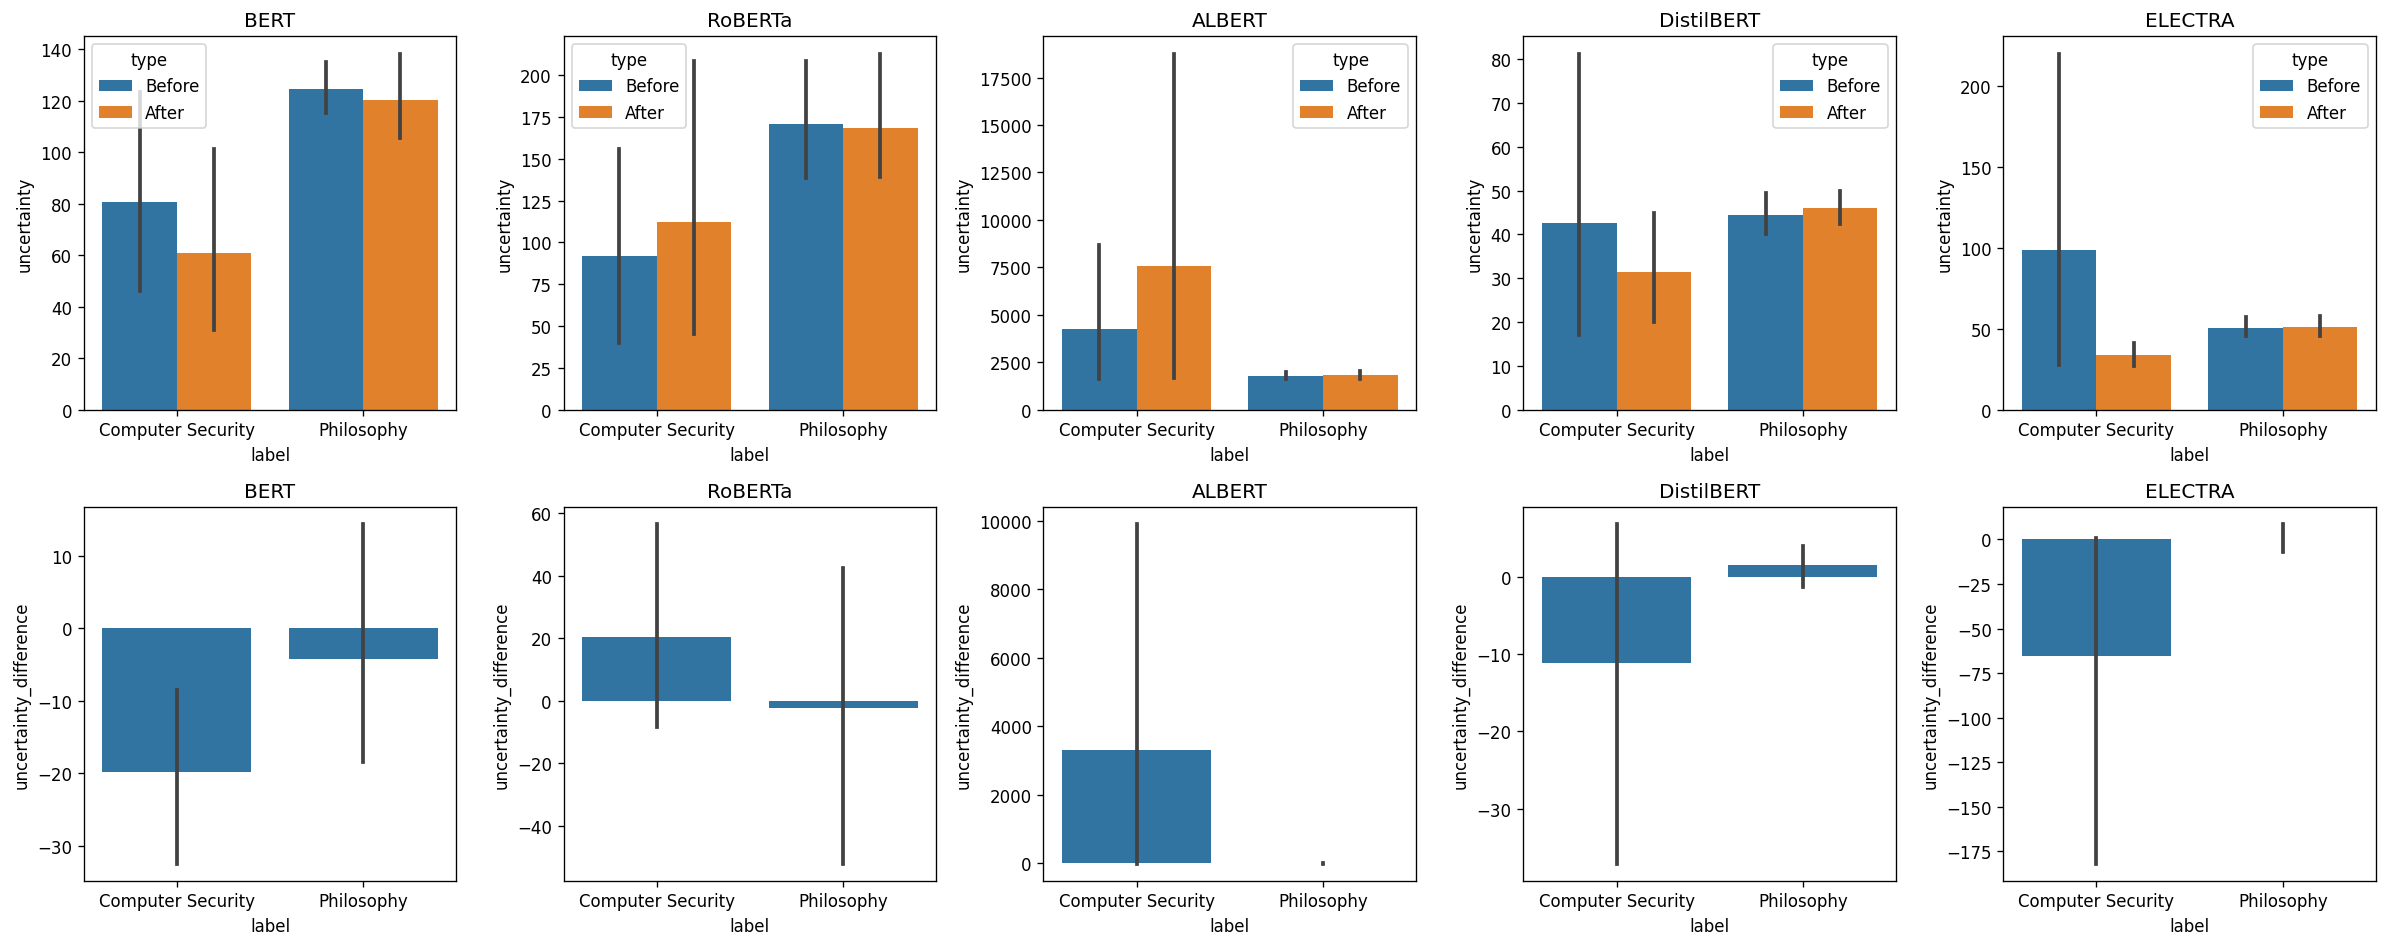

In [309]:
plot_size = 4

plt_width = len(dfs)
plt_height = 2

fig, axs = plt.subplots(
    plt_height,
    plt_width,
    figsize=(plt_width * plot_size, plt_height * plot_size),
    squeeze=False,
)

for i in range(len(dfs)):
    name, df = dfs[i]
    _, df_melted = dfs_melted[i]
    
    sns.barplot(data=df_melted, x="label", y="uncertainty", hue="type", ax=axs[0][i])
    sns.barplot(data=df, x="label", y="uncertainty_difference", ax=axs[1][i])

    for ax in axs.T[i]:
        ax.set_title(name)

plt.tight_layout()

In [310]:
for name, df in dfs:
    trained_group = df[df["label"] == trained_label]["uncertainty_difference"]
    other_groups = df[df["label"] != trained_label]["uncertainty_difference"]

    t_stat, p_value = ttest_ind(trained_group, other_groups, equal_var=False)

    print(f"{name:<10} {trained_label} vs Others T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}")

BERT       Computer Security vs Others T-statistic:      -1.4467, P-value: 0.1529
RoBERTa    Computer Security vs Others T-statistic:       0.7236, P-value: 0.4718
ALBERT     Computer Security vs Others T-statistic:       1.0023, P-value: 0.3398
DistilBERT Computer Security vs Others T-statistic:      -0.9912, P-value: 0.3444
ELECTRA    Computer Security vs Others T-statistic:      -1.1349, P-value: 0.2827


In [311]:
for name, df in dfs:
    trained_group = df[df["label"] == trained_label]["uncertainty_difference"]
    
    labels = df["label"].unique()

    for label in labels:
        if label != trained_label:
            other_group = df[df["label"] == label]["uncertainty_difference"]
            t_stat, p_value = ttest_ind(trained_group, other_group, equal_var=False)
            print(f"{name:<10} {trained_label} vs {label:<10} T-statistic: {t_stat:>12.4f}, P-value: {p_value:.4f}")

BERT       Computer Security vs Philosophy T-statistic:      -1.4467, P-value: 0.1529
RoBERTa    Computer Security vs Philosophy T-statistic:       0.7236, P-value: 0.4718
ALBERT     Computer Security vs Philosophy T-statistic:       1.0023, P-value: 0.3398
DistilBERT Computer Security vs Philosophy T-statistic:      -0.9912, P-value: 0.3444
ELECTRA    Computer Security vs Philosophy T-statistic:      -1.1349, P-value: 0.2827
